In [1]:
import itertools
import pathlib
import pyam # version: 1.4.1.dev15+g3563b43

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# these functions can be found in utils.py in this same directory
from utils import (
    make_quantiles,
    make_sequestration_plot_data,
    sequestration_plot,
    share_of_cdr_data,
)

sns.set_style('whitegrid')

<IPython.core.display.Javascript object>

# Load Data

In [2]:
data_path = pathlib.Path('../data')

In [3]:
paper_data = pd.concat([
    pd.read_csv(data_path / 'gidden_et_al_2022_ar6_reanalysis_data.csv'),
    pd.read_csv(data_path / 'additional_analysis_data.csv'),
])

In [4]:
ar6_data = pd.read_csv(data_path / 'AR6_Scenarios_Database_World_v1.0.csv')
ar6_data = ar6_data[ar6_data.Variable.isin(['Emissions|CO2|AFOLU'])]

In [5]:
df = pyam.IamDataFrame(pd.concat([paper_data, ar6_data]))
df.load_meta(data_path / 'gidden_et_al_2022_ar6_reanalysis_meta.csv')

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading meta indicators for 914 out of 1874 scenarios


In [6]:
categories_to_temp = {'C1': '1.5C', 'C3': '2C'}
df.meta['Temperature'] = df.meta['Category'].replace(categories_to_temp)

In [7]:
df.variable

['AR6 Reanalysis|OSCARv3.2|Carbon Removal',
 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land',
 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Direct',
 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Indirect',
 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Non-Land',
 'AR6 Reanalysis|OSCARv3.2|Emissions|CO2',
 'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU',
 'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU|Direct',
 'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU|Indirect',
 'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|Direct Only',
 'AR6 Reanalysis|OSCARv3.2|Emissions|Kyoto Gases',
 'AR6 Reanalysis|OSCARv3.2|Emissions|Kyoto Gases|Direct Only',
 'Change in AR6 Reanalysis|OSCARv3.2|Emissions|CO2 from 2020',
 'Change in AR6 Reanalysis|OSCARv3.2|Emissions|CO2|Direct Only from 2020',
 'Change in AR6 Reanalysis|OSCARv3.2|Emissions|Kyoto Gases from 2020',
 'Change in AR6 Reanalysis|OSCARv3.2|Emissions|Kyoto Gases|Direct Only from 2020',
 'Cumulative AR6 Reanalysis|OSCARv3.2|Emissions|CO2 from 2020',
 'Cumulat

# Panel 1A

In [8]:
variables = [
    'Emissions|CO2|AFOLU',
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU', 
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU|Direct', 
]

data = pyam.concat([
    make_quantiles(df, v, cat)
    for v, cat in itertools.product(variables, categories_to_temp.keys())
])

In [9]:
def afolu_line_plot(data, variables, cat, ax=None, years=range(1990, 2051), color='variable'):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    (
        data
        .filter(variable=variables, year=years, model=cat)
        .filter(scenario=['*0.25*', '*0.75*'])
        .convert_unit('Mt CO2/yr', to='Gt CO2/yr', factor=1e-3)
        .plot
        .line(color=color, fill_between=True, ax=ax, alpha=0.1, legend=False) #  cmap='PiYG_r',
    )
    (
        data
        .filter(variable=variables, year=years, model=cat)
        .filter(scenario=['*0.5*'])
        .convert_unit('Mt CO2/yr', to='Gt CO2/yr', factor=1e-3)
        .plot
        .line(color=color, ax=ax)  # cmap='PiYG_r',
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[-len(variables):], l[-len(variables):])
    return ax

In [10]:
color_map = {
    'Emissions|CO2|AFOLU': '#' + 'c' * 6,
    'LULUCF Emissions - Reanalyzed': '#33701a',
    'LULUCF Emissions - NGHGI Correction': '#a3176d', 
}
pyam.run_control().update({'color': {'variable': color_map}})

c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


Text(0.5, 0, '')

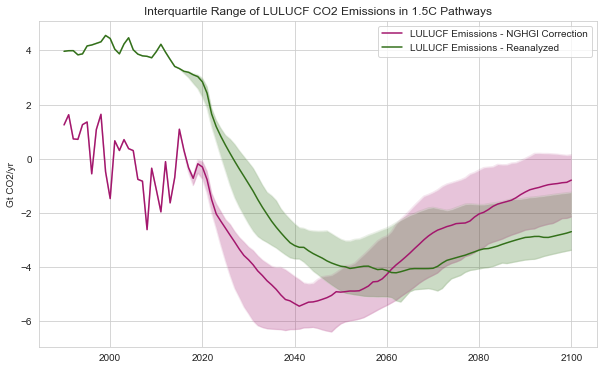

In [11]:
cat = 'C1'

variables = {
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU|Direct': 'LULUCF Emissions - Reanalyzed',
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU': 'LULUCF Emissions - NGHGI Correction', 
}
fig, ax = plt.subplots(figsize=(10, 6))
afolu_line_plot(data.rename(variable=variables), variables.values(), cat, years=range(1990, 2101), ax=ax)
ax.set_title(f'Interquartile Range of LULUCF CO2 Emissions in {categories_to_temp[cat]} Pathways')
ax.set_xlabel('')

c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


Text(0.5, 0, '')

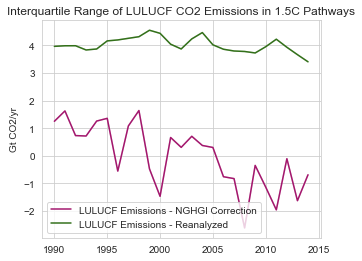

In [12]:
cat = 'C1'

variables = {
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU|Direct': 'LULUCF Emissions - Reanalyzed',
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU': 'LULUCF Emissions - NGHGI Correction', 
}
fig, ax = plt.subplots(figsize=(5, 4))
afolu_line_plot(data.rename(variable=variables), variables.values(), cat, years=range(1900, 2015), ax=ax)
ax.set_title(f'Interquartile Range of LULUCF CO2 Emissions in {categories_to_temp[cat]} Pathways')
ax.set_xlabel('')


## Additional Figures for SI

### S1

c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


Text(0.5, 0, '')

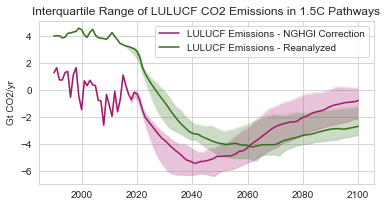

In [13]:
cat = 'C1'

variables = {
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU|Direct': 'LULUCF Emissions - Reanalyzed',
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU': 'LULUCF Emissions - NGHGI Correction', 
}
fig, ax = plt.subplots(figsize=(6, 3))
afolu_line_plot(data.rename(variable=variables), variables.values(), cat, years=range(1990, 2101), ax=ax)
ax.set_title(f'Interquartile Range of LULUCF CO2 Emissions in {categories_to_temp[cat]} Pathways')
ax.set_xlabel('')

c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


Text(0.5, 0, '')

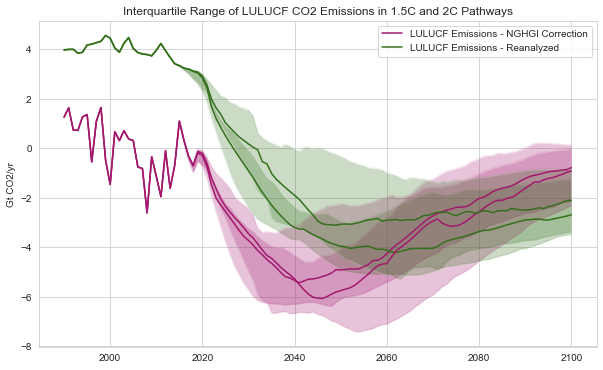

In [14]:
variables = {
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU|Direct': 'LULUCF Emissions - Reanalyzed',
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU': 'LULUCF Emissions - NGHGI Correction', 
}
fig, ax = plt.subplots(figsize=(10, 6))

cat = 'C1'
afolu_line_plot(data.rename(variable=variables), variables.values(), cat, years=range(1990, 2101), ax=ax)

cat = 'C3'
afolu_line_plot(data.rename(variable=variables), variables.values(), cat, years=range(1990, 2101), ax=ax)
ax.set_title(f'Interquartile Range of LULUCF CO2 Emissions in 1.5C and 2C Pathways')
ax.set_xlabel('')


# Panel 1B

Text(0.5, 0, '')

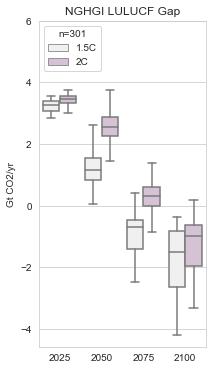

In [15]:
variables = [
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU|Direct', 
    'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU', 
]
name = 'NGHGI LULUCF Gap'
fig, ax = plt.subplots(figsize=(3, 6))
(
    df
    .filter(region='World', variable=variables)
    .filter(Temperature=categories_to_temp.values())
    .filter(year=range(2025, 2101, 25))
    .subtract(variables[0], variables[1], name=name, ignore_units='Mt CO2/yr')
    .convert_unit('Mt CO2/yr', to='Gt CO2/yr', factor=1e-3)
    .plot
    .box(color='thistle', by='Temperature', ax=ax, showfliers=False)
)
ax.set_title(name)
ax.set_ylim(None, 6)
ax.set_xlabel('')

# Panel 1C

In [16]:
variables = {
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal': 'Total CDR', 
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land': 'Land CDR',
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Non-Land': 'Non-Land CDR',
}
hist = [2015, 2020]
hist = [2020]
future = [2030, 2050]
future = [2030, 2050, 2100]
data, pdata = make_sequestration_plot_data(
    df.filter(variable=variables.keys(), region='World').rename({'variable': variables}), 
    variables.values(), 
    categories_to_temp, years=hist + future
)
for year in hist:
    pdata = pdata.drop(f'{year} 1.5C').rename(index={f'{year} 2C': str(year)})

Text(0, 0.5, '')

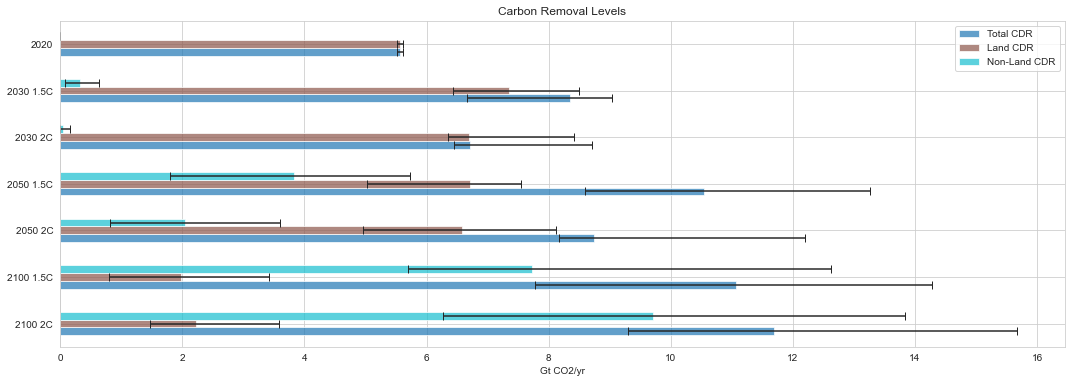

In [17]:
size = 4
fig, ax = plt.subplots(figsize=(4.5 * size, 1.5 * size))
sequestration_plot(
    pdata, 
    medians=False, stacked=False, order=variables.values(), cmap='tab10',
    legend={'loc': 'best'}, ax=ax,
)
ax.set_title('Carbon Removal Levels')
ax.set_xlabel('Gt CO2/yr') 
ax.set_ylabel('')
#ax.set_xlim(0, 18)
#ax.legend(**pyam.plotting.OUTSIDE_LEGEND['bottom'])

In [18]:
pdata - pdata.loc['2020']

scenario       0.25                              0.5                         \
variable   Land CDR Non-Land CDR Total CDR  Land CDR Non-Land CDR Total CDR   
index                                                                         
2100 2C   -4.053524     6.271235  3.781920 -3.331225     9.713288  6.136040   
2100 1.5C -4.725059     5.693627  2.248217 -3.581048     7.722147  5.516276   
2050 2C   -0.570736     0.817113  2.654295  1.023967     2.050864  3.179502   
2050 1.5C -0.492956     1.800682  3.079464  1.150183     3.835029  4.993039   
2030 2C    0.830189     0.004387  0.924083  1.133051     0.038758  1.160155   
2030 1.5C  0.917167     0.071209  1.136064  1.796785     0.321274  2.799087   
2020       0.000000     0.000000  0.000000  0.000000     0.000000  0.000000   

scenario       0.75                          
variable   Land CDR Non-Land CDR  Total CDR  
index                                        
2100 2C   -2.020609    13.828697  10.056098  
2100 1.5C -2.187980    12.621893   8.664533  
2050 2C    2.506327     3.603253   6.590691  
2050 1.5C  1.942010     5.725026   7.650568  
2030 2C    2.810302     0.160454   3.104408  
2030 1.5C  2.887021     0.630474   3.433723  
2020       0.000000     0.000000   0.000000

In [19]:
pdata / pdata.loc['2020']

scenario       0.25                              0.5                         \
variable   Land CDR Non-Land CDR Total CDR  Land CDR Non-Land CDR Total CDR   
index                                                                         
2100 2C    0.265976          inf  1.684822  0.400638          inf  2.104007   
2100 1.5C  0.144373          inf  1.407103  0.355690          inf  1.992497   
2050 2C    0.896649          inf  1.480634  1.184235          inf  1.572061   
2050 1.5C  0.910734          inf  1.557623  1.206944          inf  1.898356   
2030 2C    1.150333          inf  1.167331  1.203861          inf  1.208737   
2030 1.5C  1.166083          inf  1.205716  1.323282          inf  1.503616   
2020       1.000000          NaN  1.000000  1.000000          NaN  1.000000   

scenario       0.75                          
variable   Land CDR  Non-Land CDR Total CDR  
index                                        
2100 2C    0.639724  35847.533985  2.792198  
2100 1.5C  0.609882  32719.277464  2.544193  
2050 2C    1.446880   9341.297373  2.174593  
2050 1.5C  1.346262  14841.324347  2.363484  
2030 2C    1.501079    416.927354  1.553268  
2030 1.5C  1.514758   1635.305035  1.611958  
2020       1.000000      1.000000  1.000000

## Figure for SI

### S2

In [20]:
variables = {
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Direct': 'Direct Land CDR',
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Indirect': 'Indirect Land CDR',
}
hist = [2015, 2020]
hist = [2020]
future = [2030, 2050]
future = [2030, 2050, 2100]
data, pdata = make_sequestration_plot_data(
    df.filter(variable=variables.keys(), region='World').rename({'variable': variables}), 
    variables.values(), 
    categories_to_temp, years=hist + future
)
for year in hist:
    pdata = pdata.drop(f'{year} 1.5C').rename(index={f'{year} 2C': str(year)})

Text(0, 0.5, '')

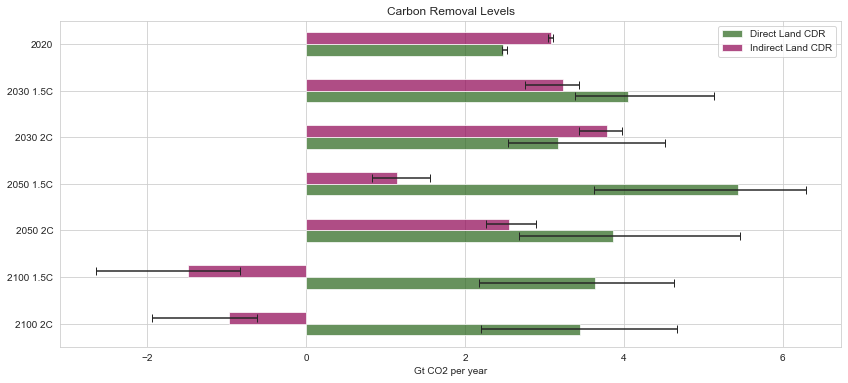

In [21]:
size = 4
fig, ax = plt.subplots(figsize=(3.5 * size, 1.5 * size))
sequestration_plot(
    pdata, 
    medians=False, stacked=False, order=variables.values(), cmap='PiYG_r',
    legend={'loc': 'best'}, ax=ax,
)
ax.set_title('Carbon Removal Levels')
ax.set_xlabel('Gt CO2 per year') 
ax.set_ylabel('')
#ax.set_xlim(0, 18)
#ax.legend(**pyam.plotting.OUTSIDE_LEGEND['bottom'])

In [22]:
pdata/ pdata.loc['2020']

scenario             0.25                               0.5                    \
variable  Direct Land CDR Indirect Land CDR Direct Land CDR Indirect Land CDR   
index                                                                           
2100 2C          0.889908         -0.637839        1.386553         -0.314799   
2100 1.5C        0.879604         -0.871055        1.465213         -0.483882   
2050 2C          1.083839          0.745804        1.554694          0.829782   
2050 1.5C        1.466897          0.273017        2.188953          0.372934   
2030 2C          1.026133          1.128086        1.275939          1.229089   
2030 1.5C        1.367713          0.904038        1.629532          1.049510   
2020             1.000000          1.000000        1.000000          1.000000   

scenario             0.75                    
variable  Direct Land CDR Indirect Land CDR  
index                                        
2100 2C          1.847507         -0.200401  
2100 1.5C        1.833274         -0.268217  
2050 2C          2.164417          0.930474  
2050 1.5C        2.490735          0.502465  
2030 2C          1.789481          1.281603  
2030 1.5C        2.032962          1.107823  
2020             1.000000          1.000000

### S3

In [23]:
variables = ['Cumulative Carbon Sink - Indirect', 'Cumulative Carbon Sink - Direct']
data, pdata = make_sequestration_plot_data(df.filter(region='World'), variables, categories_to_temp, years=future)

Text(0, 0.5, '')

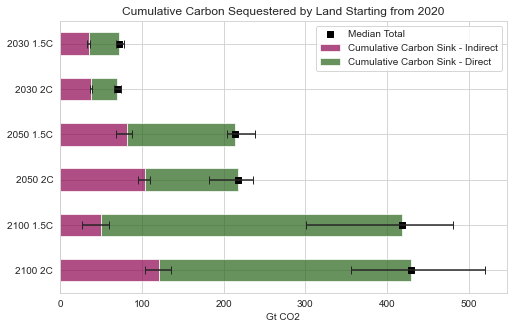

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sequestration_plot(pdata, order=variables, legend={'loc': 'best'}, ax=ax)
ax.set_title('Cumulative Carbon Sequestered by Land Starting from 2020')
ax.set_xlabel('Gt CO2')
ax.set_ylabel('')

In [25]:
pdata / pdata.loc['2050 2C']

scenario                             0.25                                    \
variable  Cumulative Carbon Sink - Direct Cumulative Carbon Sink - Indirect   
index                                                                         
2100 2C                          3.014356                          1.091916   
2100 1.5C                        3.214070                          0.276841   
2050 2C                          1.000000                          1.000000   
2050 1.5C                        1.577283                          0.722640   
2030 2C                          0.358108                          0.379731   
2030 1.5C                        0.425101                          0.349007   

scenario                              0.5                                    \
variable  Cumulative Carbon Sink - Direct Cumulative Carbon Sink - Indirect   
index                                                                         
2100 2C                          2.718107                          1.168708   
2100 1.5C                        3.250865                          0.485658   
2050 2C                          1.000000                          1.000000   
2050 1.5C                        1.173520                          0.781819   
2030 2C                          0.275297                          0.366639   
2030 1.5C                        0.317184                          0.340978   

scenario                             0.75                                    
variable  Cumulative Carbon Sink - Direct Cumulative Carbon Sink - Indirect  
index                                                                        
2100 2C                          3.031488                          1.240228  
2100 1.5C                        3.268373                          0.547114  
2050 2C                          1.000000                          1.000000  
2050 1.5C                        1.189972                          0.801855  
2030 2C                          0.272112                          0.356938  
2030 1.5C                        0.320800                          0.333605

# Share of CDR

In [26]:
# fraction of total cdr
total_share = share_of_cdr_data(df, categories_to_temp, quantiles=(0.1, 0.25, 0.5, 0.75, 0.9))
total_share.round(decimals=2)

2020  2030  2040  \
model scenario region variable                unit                         
1.5C  0.1      World  Land Share of Total CDR fraction   1.0  0.84  0.50   
      0.25     World  Land Share of Total CDR fraction   1.0  0.92  0.69   
      0.5      World  Land Share of Total CDR fraction   1.0  0.96  0.82   
      0.75     World  Land Share of Total CDR fraction   1.0  0.99  0.93   
      0.9      World  Land Share of Total CDR fraction   1.0  0.99  0.96   
2C    0.1      World  Land Share of Total CDR fraction   1.0  0.94  0.65   
      0.25     World  Land Share of Total CDR fraction   1.0  0.98  0.83   
      0.5      World  Land Share of Total CDR fraction   1.0  0.99  0.93   
      0.75     World  Land Share of Total CDR fraction   1.0  1.00  0.97   
      0.9      World  Land Share of Total CDR fraction   1.0  1.00  0.98   

                                                        2050  2060  2070  \
model scenario region variable                unit                         
1.5C  0.1      World  Land Share of Total CDR fraction  0.25  0.17  0.10   
      0.25     World  Land Share of Total CDR fraction  0.49  0.34  0.25   
      0.5      World  Land Share of Total CDR fraction  0.65  0.53  0.39   
      0.75     World  Land Share of Total CDR fraction  0.79  0.66  0.53   
      0.9      World  Land Share of Total CDR fraction  0.87  0.73  0.65   
2C    0.1      World  Land Share of Total CDR fraction  0.39  0.24  0.18   
      0.25     World  Land Share of Total CDR fraction  0.56  0.36  0.27   
      0.5      World  Land Share of Total CDR fraction  0.77  0.60  0.44   
      0.75     World  Land Share of Total CDR fraction  0.90  0.76  0.59   
      0.9      World  Land Share of Total CDR fraction  0.94  0.83  0.65   

                                                        2080  2090  2100  
model scenario region variable                unit                        
1.5C  0.1      World  Land Share of Total CDR fraction  0.06  0.04 -0.00  
      0.25     World  Land Share of Total CDR fraction  0.19  0.11  0.06  
      0.5      World  Land Share of Total CDR fraction  0.31  0.24  0.19  
      0.75     World  Land Share of Total CDR fraction  0.44  0.38  0.36  
      0.9      World  Land Share of Total CDR fraction  0.64  0.63  0.66  
2C    0.1      World  Land Share of Total CDR fraction  0.10  0.06  0.03  
      0.25     World  Land Share of Total CDR fraction  0.21  0.18  0.14  
      0.5      World  Land Share of Total CDR fraction  0.33  0.26  0.20  
      0.75     World  Land Share of Total CDR fraction  0.45  0.35  0.29  
      0.9      World  Land Share of Total CDR fraction  0.51  0.44  0.40

### S4

In [27]:
color_map = {
    '1.5C': 'AR6-C1',
    '2C': 'AR6-C3',
}
pyam.run_control().update({'color': {'model': color_map}})

c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


Text(0.5, 1.0, 'Total Gross Carbon Removals from Land')

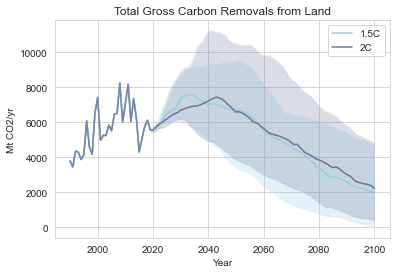

In [28]:
fig, ax = plt.subplots()
data = pyam.concat([make_quantiles(df, 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land', cat) for cat in ['C1', 'C3']])
data = data.rename({'model': categories_to_temp})
(
        data
        .filter(scenario='*0.5*')
        .plot
        .line(color='model', ax=ax, legend=True)
)
(
        data
        .filter(scenario=['*0.25*', '*0.75*'], keep=False)
        .plot
        .line(color='model', fill_between=True, ax=ax, alpha=0.1)
)
ax.set_title('Total Gross Carbon Removals from Land')

c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


Text(0.5, 1.0, 'Share of Total Annual CDR from Land')

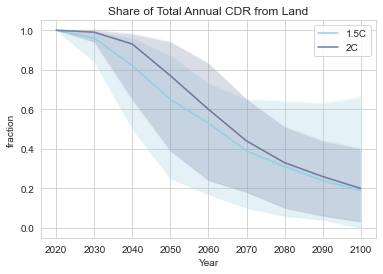

In [29]:
fig, ax = plt.subplots()
cmap = 'Accent'
data = pyam.IamDataFrame(total_share.round(decimals=2))
(
        data
        .filter(scenario='*0.5*')
        .plot
        .line(color='model', ax=ax, legend=True, cmap=cmap)
)
(
        data
        .filter(scenario=['*0.25*', '*0.75*'], keep=False)
        .plot
        .line(color='model', fill_between=True, ax=ax, alpha=0.1, cmap=cmap)
)
ax.set_title('Share of Total Annual CDR from Land')

In [30]:
# fraction of *new* cdr
# negative values arise because land begins to store less carbon than it did in 2020
# accordingly, this metric only really makes sense until ~2050
new_share = share_of_cdr_data(df, categories_to_temp, offset=2020)
new_share.round(decimals=2)

2030  2040  2050  \
model scenario region variable                unit                         
1.5C  0.25     World  Land Share of Total CDR fraction  0.74  0.30 -0.09   
      0.5      World  Land Share of Total CDR fraction  0.89  0.58  0.27   
      0.75     World  Land Share of Total CDR fraction  0.94  0.73  0.51   
2C    0.25     World  Land Share of Total CDR fraction  0.92  0.49  0.07   
      0.5      World  Land Share of Total CDR fraction  0.98  0.84  0.63   
      0.75     World  Land Share of Total CDR fraction  1.00  0.92  0.79   

                                                        2060  2070  2080  \
model scenario region variable                unit                         
1.5C  0.25     World  Land Share of Total CDR fraction -0.39 -0.53 -0.61   
      0.5      World  Land Share of Total CDR fraction  0.05 -0.19 -0.40   
      0.75     World  Land Share of Total CDR fraction  0.23  0.02 -0.12   
2C    0.25     World  Land Share of Total CDR fraction -0.26 -0.53 -0.60   
      0.5      World  Land Share of Total CDR fraction  0.34  0.03 -0.19   
      0.75     World  Land Share of Total CDR fraction  0.52  0.22  0.01   

                                                        2090  2100  
model scenario region variable                unit                  
1.5C  0.25     World  Land Share of Total CDR fraction -0.74 -0.79  
      0.5      World  Land Share of Total CDR fraction -0.49 -0.53  
      0.75     World  Land Share of Total CDR fraction -0.12 -0.17  
2C    0.25     World  Land Share of Total CDR fraction -0.71 -0.77  
      0.5      World  Land Share of Total CDR fraction -0.36 -0.55  
      0.75     World  Land Share of Total CDR fraction -0.18 -0.26

In [31]:
df.variable

['AR6 Reanalysis|OSCARv3.2|Carbon Removal',
 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land',
 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Direct',
 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Indirect',
 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Non-Land',
 'AR6 Reanalysis|OSCARv3.2|Emissions|CO2',
 'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU',
 'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU|Direct',
 'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|AFOLU|Indirect',
 'AR6 Reanalysis|OSCARv3.2|Emissions|CO2|Direct Only',
 'AR6 Reanalysis|OSCARv3.2|Emissions|Kyoto Gases',
 'AR6 Reanalysis|OSCARv3.2|Emissions|Kyoto Gases|Direct Only',
 'Change in AR6 Reanalysis|OSCARv3.2|Emissions|CO2 from 2020',
 'Change in AR6 Reanalysis|OSCARv3.2|Emissions|CO2|Direct Only from 2020',
 'Change in AR6 Reanalysis|OSCARv3.2|Emissions|Kyoto Gases from 2020',
 'Change in AR6 Reanalysis|OSCARv3.2|Emissions|Kyoto Gases|Direct Only from 2020',
 'Cumulative AR6 Reanalysis|OSCARv3.2|Emissions|CO2 from 2020',
 'Cumulat

c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


Text(0.5, 1.0, 'Total Indirect Gross Carbon Removals from Land')

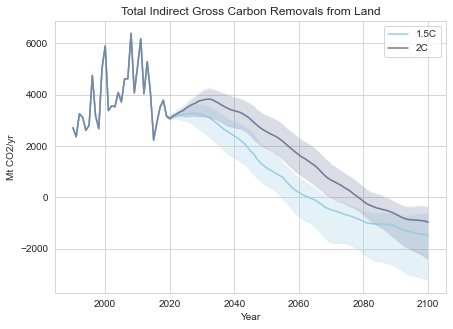

In [32]:
fig, ax = plt.subplots(figsize=(7, 5))
data = pyam.concat([make_quantiles(df, 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Indirect', cat) for cat in ['C1', 'C3']])
data = data.rename({'model': categories_to_temp})
(
        data
        .filter(scenario='*0.5*')
        .plot
        .line(color='model', ax=ax, legend=True)
)
(
        data
        .filter(scenario=['*0.25*', '*0.75*'], keep=False)
        .plot
        .line(color='model', fill_between=True, ax=ax, alpha=0.1)
)
ax.set_title('Total Indirect Gross Carbon Removals from Land')

In [33]:
len(
    df
    .filter(variable='AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Direct', region='World')
    .filter(Category=['C1', 'C2', 'C3'])
#     .filter(Category=['C3'])
    .index
)

407

c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


Text(0.5, 1.0, 'Total Direct Gross Carbon Removals from Land')

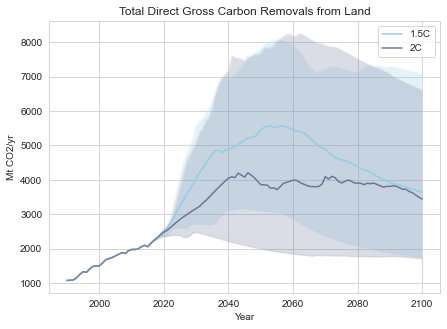

In [34]:
fig, ax = plt.subplots(figsize=(7, 5))
data = pyam.concat([make_quantiles(df, 'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Direct', cat) for cat in ['C1', 'C3']])
data = data.rename({'model': categories_to_temp})
(
        data
        .filter(scenario='*0.5*')
        .plot
        .line(color='model', ax=ax, legend=True)
)
(
        data
        .filter(scenario=['*0.25*', '*0.75*'], keep=False)
        .plot
        .line(color='model', fill_between=True, ax=ax, alpha=0.1)
)
ax.set_title('Total Direct Gross Carbon Removals from Land')